## <center> **National Geographic and it's Landscape**
#### <center> Erik Vizcaino
#### <center> *On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.*

## 1. Objective:
    - Gather business intelligence in regards to National Geographics Maps. This includes the sentiment of user interactions
    as well as topics of interest. From this point, measure how this fares with the National Park Service to generate
    leads. Finally, I will search for the relationship between this extension, and the National Geographic Social Media page
    as a whole. 
    - Would I be able to craft a sample tweet that capitalizes on ongoing traffic?
####   Questions: What attracts users? What invokes a positive reaction to the NPS? Is there any overlap between the NPS and NatGeoMaps?

<img src = "NatGeoMaps.jpg">

## 3. Import packages

In [2]:
# Import Packages
import requests
from lxml import html
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import numpy as np
import nltk
nltk.download('vader_lexicon')
from PIL import Image
from os import path
import random
# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/nbuser/nltk_data...


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


     |████████████████████████████████| 368kB 3.6MB/s eta 0:00:01


In [37]:
from nltk.corpus import stopwords

In [41]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [112]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [146]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

In [73]:
stopwords = stopwords.words('english')

In [71]:
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re

In [268]:
from nltk import bigrams

import itertools
import collections

    a. I used a feature though NodeXL to pull tweets from Twitter. I pull 2,000 tweets from three key words.
        - NatGeoMaps
        - NatlParkService
        - NatGeo

    b. I will now import the three data sets in the order they are listed above.
        - I will also create a header and only include columns used for sentiment analysis

In [242]:
maps = pd.read_csv('NatGeoMaps_data.csv', encoding='cp1252')
maps.head(2)
new_header = maps.iloc[0] #grab the first row for the header
maps = maps[1:] #take the data less the header row
maps.columns = new_header #set the header row as the df header
maps1 = maps[['Vertex 1', 'Vertex 2', 'Tweet', 'Relationship']]
maps1.count()

0
Vertex 1        367
Vertex 2        367
Tweet           367
Relationship    367
dtype: int64

In [243]:
maps1.head()

,Vertex 1,Vertex 2,Tweet,Relationship
1,goanalytics360,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
2,datanme,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
3,vizualdatos,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
4,arunbalaji_aji,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
5,studio_v2,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions


In [244]:
nps = pd.read_csv('NPS_tweetdata.csv', encoding='cp1252')
nps.head(2)
new_header = nps.iloc[0] #grab the first row for the header
nps = nps[1:] #take the data less the header row
nps.columns = new_header #set the header row as the df header
nps1 = nps[['Vertex 1', 'Vertex 2', 'Tweet', 'Relationship']]
nps1.count()


0
Vertex 1        4635
Vertex 2        4635
Tweet           4635
Relationship    4635
dtype: int64

In [245]:
nps1.head(2)

,Vertex 1,Vertex 2,Tweet,Relationship
1,debmgriffin2,us,RT @FLOTUS: It was wonderful to visit the Wash...,Mentions
2,debmgriffin2,natlparkservice,RT @FLOTUS: It was wonderful to visit the Wash...,Mentions


In [246]:
natgeo = pd.read_csv('NatGeo_data.csv', encoding='cp1252')
natgeo.head(2)
new_header = natgeo.iloc[0] #grab the first row for the header
natgeo = natgeo[1:] #take the data less the header row
natgeo.columns = new_header #set the header row as the df header
natgeo1 = natgeo[['Vertex 1', 'Vertex 2', 'Tweet', 'Relationship']]
natgeo1.count()

0
Vertex 1        2569
Vertex 2        2569
Tweet           2569
Relationship    2569
dtype: int64

In [32]:
natgeo1.head(2)

,Vertex 1,Vertex 2,Tweet,Relationship
1,singhragbag,natgeo,@NatGeo And the wiener is?,Replies to
2,douglasmclaurin,natgeo,RT @NatGeo: The tremendous variety of living s...,Mentions


    c. Now that we have our 4 columns of data, I will explain each one.
        - Vertex 1 is the name of the account that produced the tweet
        - Vertex 2 are accounts that were tagged in the tweet
        - Tweet contains the original tweet
        - Relationship describes way vertex 1 and 2 work together

## 3. Data Cleaning & Text Preprocessing 

In [74]:
maps_clean = maps1
# remove numbers
maps_clean['Tweet'] = maps_clean.Tweet.str.replace('\d+', '')
# lower case
maps_clean['Tweet'] = maps_clean['Tweet'].str.lower()
# remove non english
maps_clean['Tweet'] = maps_clean.Tweet.str.replace('[^a-zA-Z]+', ' ')
# remove short words
maps_clean['Tweet'] = maps_clean.Tweet.str.findall('\w{2,}').str.join(' ')
# Remove stop words
maps_clean['Tweet'] = maps_clean.Tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [75]:
maps_clean.head(2)

,Vertex 1,Vertex 2,Tweet,Relationship
1,goanalytics360,natgeomaps,rt natgeomaps see countries fund scientific re...,Mentions
2,datanme,natgeomaps,rt natgeomaps see countries fund scientific re...,Mentions


In [76]:
def text_processing(maps_clean):
    # what if you have additional stopwords to be removed
    tokens = str(maps_clean)
    #tokenization or word split
    tokens = word_tokenize(tokens)
    #get stemming words or lemmas
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
    return tokens

In [92]:
maps_tweets = maps_clean['Tweet']
maps_tweets.head(1)

1    rt natgeomaps see countries fund scientific re...
Name: Tweet, dtype: object

- After cleaning the NatGeoMaps tweets, I then created a dataframe solely for the tweets. I will repeat this process for
    the other tweets I have.

In [80]:
nps_clean = nps1
# remove numbers
nps_clean['Tweet'] = nps_clean.Tweet.str.replace('\d+', '')
# lower case
nps_clean['Tweet'] = nps_clean['Tweet'].str.lower()
# remove non english
nps_clean['Tweet'] = nps_clean.Tweet.str.replace('[^a-zA-Z]+', ' ')
# remove short words
nps_clean['Tweet'] = nps_clean.Tweet.str.findall('\w{2,}').str.join(' ')
# Remove stop words
nps_clean['Tweet'] = nps_clean.Tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [81]:
def text_processing(nps_clean):
    # what if you have additional stopwords to be removed
    tokens1 = str(nps_clean)
    #tokenization or word split
    tokens1 = word_tokenize(tokens1)
    #get stemming words or lemmas
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens1 = (wordnet_lemmatizer.lemmatize(word) for word in tokens1)
    return tokens1

In [82]:
nps_tweets = nps_clean['Tweet']
nps_tweets.head(1)

1    rt flotus wonderful visit washington monument ...
Name: Tweet, dtype: object

- I have the National Park Service tweets cleaned up now, and last is NatGeo. 

In [83]:
natgeo_clean = natgeo1
# remove numbers
natgeo_clean['Tweet'] = natgeo_clean.Tweet.str.replace('\d+', '')
# lower case
natgeo_clean['Tweet'] = natgeo_clean['Tweet'].str.lower()
# remove non english
natgeo_clean['Tweet'] = natgeo_clean.Tweet.str.replace('[^a-zA-Z]+', ' ')
# remove short words
natgeo_clean['Tweet'] = natgeo_clean.Tweet.str.findall('\w{2,}').str.join(' ')
# Remove stop words
natgeo_clean['Tweet'] = natgeo_clean.Tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [84]:
def text_processing(natgeo_clean):
    # what if you have additional stopwords to be removed
    tokens2 = str(natgeo_clean)
    #tokenization or word split
    tokens2 = word_tokenize(tokens2)
    #get stemming words or lemmas
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens2 = (wordnet_lemmatizer.lemmatize(word) for word in tokens2)
    return tokens2

In [85]:
natgeo_tweets = natgeo_clean['Tweet']
natgeo_tweets.head(1)

1    natgeo wiener
Name: Tweet, dtype: object

### - So now that I have processed the tweets, I can analyze them. Lets see what the data has to say!

## 4. Descriptive Analytics (Word Cloud/ Frequency)

- **a. Frequency**

In [101]:
# using collections python library to count
from collections import Counter

fdist = list(Counter(" ".join(maps_clean['Tweet']).split(" ")).items())

freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)
# sorting

wordlist.sort_values(1, ascending=False).head(20)

,0,1
8,co,336
7,https,324
0,rt,300
1,natgeomaps,286
11,map,176
12,day,111
40,north,47
211,years,36
96,tokyo,34
98,megacity,34


    - Since these are the tweets from NatGeoMaps, it does make sense that we see many terms related to maps.
    Latitude, south, span, mile. What I find interested is the term "megacity".

In [103]:
fdist = list(Counter(" ".join(nps_clean['Tweet']).split(" ")).items())

freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)
# sorting

wordlist.sort_values(1, ascending=False).head(20)

,0,1
13,natlparkservice,3530
48,https,2291
0,rt,2281
49,co,2143
6,us,1941
1,flotus,1579
7,national,1162
9,mrs,1054
4,washington,1050
10,abe,1036


 - Of course we are able to see that the National Park Services' name is in here. That's a bad job of me cleaning. 
 However, as we continue to look, you will notice words like arboretum, usda, and abe. I imagine the other words
 must have something to do with a current event. Perhaps, Melania is visiting a NPS event.

In [104]:
fdist = list(Counter(" ".join(natgeo_clean['Tweet']).split(" ")).items())

freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)
# sorting

wordlist.sort_values(1, ascending=False).head(20)

,0,1
2,rt,1735
0,natgeo,1697
17,https,1447
18,co,1367
69,hostileplanet,383
10,water,289
13,may,285
94,number,253
313,polar,238
15,extinction,194


- Finally, on NatGeo social media page, words such as water, extinction, sea, and food really stand out to me. 
    These must have to do with a current show known as Hostile Planet. 

- **b. Word Clouds**

In [106]:
maps_tweets.to_csv("maps_tweets.csv", index=False, encoding='utf-8')

(-0.5, 2399.5, 959.5, -0.5)

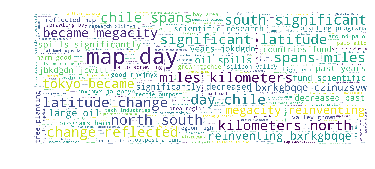

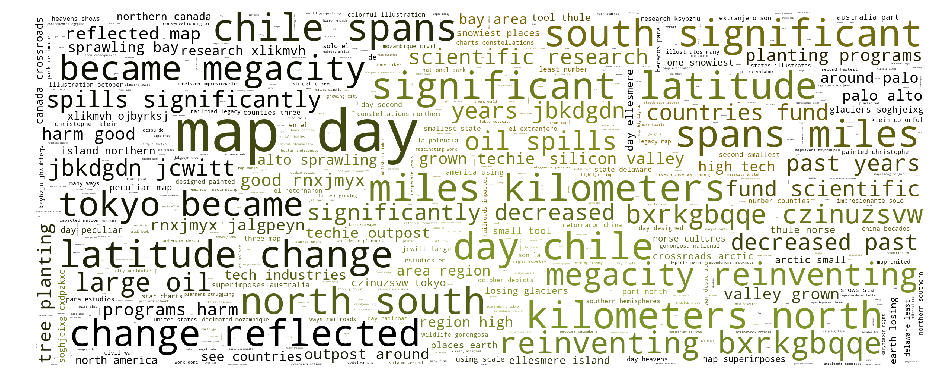

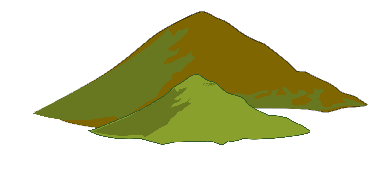

In [133]:
text = open('maps_tweets.csv', encoding="utf8").read()

alice_coloring = np.array(Image.open("mountain1.png"))
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("co")
stopwords.add("rt")
stopwords.add("even")
stopwords.add("natgeomaps")
stopwords.add("movie")
stopwords.add("big")

wc = WordCloud(background_color= "white",max_words=1000, stopwords=stopwords, margin=10, mask = alice_coloring,
               random_state=1).generate(text)
# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
plt.imshow(wc)
plt.axis("off")

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.figure(figsize=(16,16))
plt.imshow(wc.recolor(color_func=image_colors, random_state=4))
plt.axis("off")

plt.figure()
plt.imshow(alice_coloring, cmap=plt.cm.gray)
plt.axis("off")

In [127]:
nps_tweets.to_csv("nps_tweets.csv", index=False, encoding='utf-8')

(-0.5, 2399.5, 959.5, -0.5)

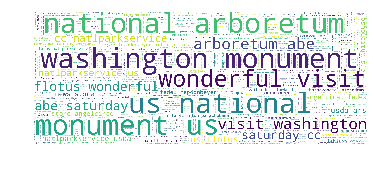

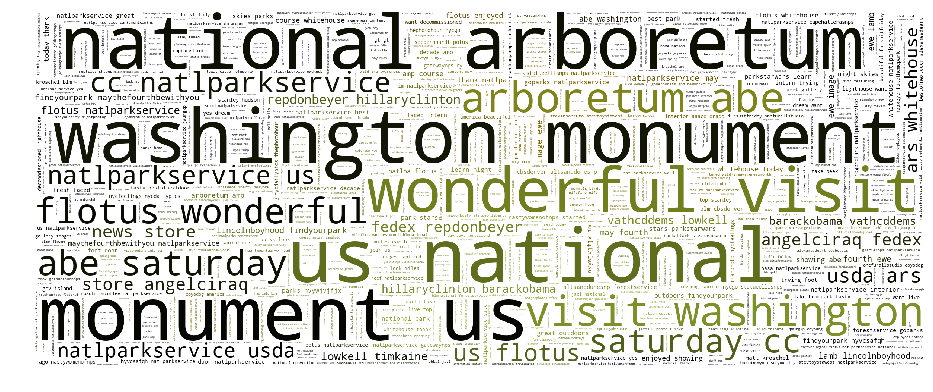

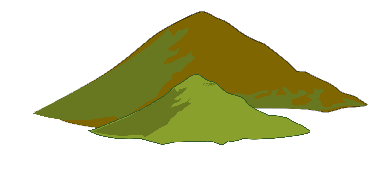

In [132]:
text = open('nps_tweets.csv', encoding="utf8").read()

alice_coloring = np.array(Image.open("mountain1.png"))
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("co")
stopwords.add("rt")
stopwords.add("mrs")
stopwords.add("natgeomaps")
stopwords.add("movie")
stopwords.add("big")

wc = WordCloud(background_color= "white", max_words=1000, stopwords=stopwords, margin=10, mask = alice_coloring,
               random_state=1).generate(text)
# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
plt.imshow(wc)
plt.axis("off")

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.figure(figsize=(16,16))
plt.imshow(wc.recolor(color_func=image_colors, random_state=4))
plt.axis("off")

plt.figure()
plt.imshow(alice_coloring, cmap=plt.cm.gray)
plt.axis("off")

In [130]:
natgeo_tweets.to_csv("natgeo_tweets.csv", index=False, encoding='utf-8')

(-0.5, 2399.5, 959.5, -0.5)

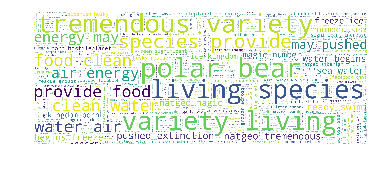

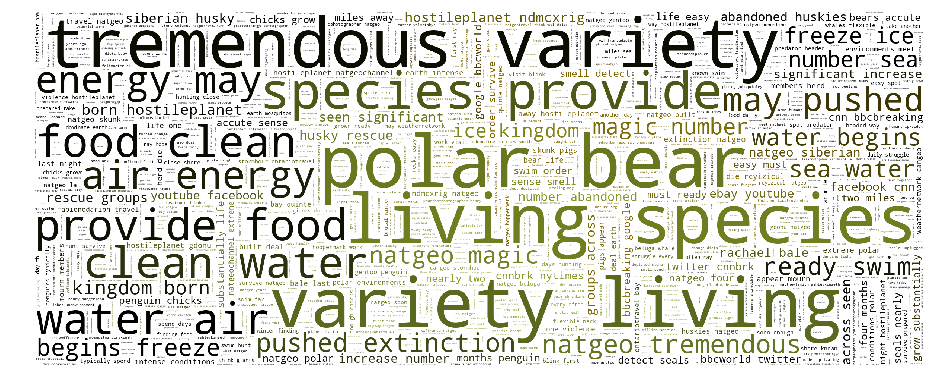

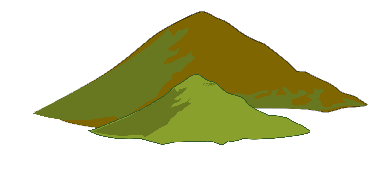

In [134]:
text = open('natgeo_tweets.csv', encoding="utf8").read()

alice_coloring = np.array(Image.open("mountain1.png"))
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("co")
stopwords.add("rt")
stopwords.add("mrs")
stopwords.add("natgeomaps")
stopwords.add("movie")
stopwords.add("big")

wc = WordCloud(background_color= "white",max_words=1000, stopwords=stopwords, margin=10, mask = alice_coloring,
               random_state=1).generate(text)
# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
plt.imshow(wc)
plt.axis("off")

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.figure(figsize=(16,16))
plt.imshow(wc.recolor(color_func=image_colors, random_state=4))
plt.axis("off")

plt.figure()
plt.imshow(alice_coloring, cmap=plt.cm.gray)
plt.axis("off")

- After seeing the word blobs, and comparing them to the word frequency. I definitely see components that could
create engaging content for the consumer. I will show this in story telling with a sample tweet.

## 5. Content Analytis (Topic Modeling and Sentiment Analysis)

- **a. Topic Modeling**

In [142]:
texts = []
r = csv.reader(open('maps_tweets.csv', 'r'))

for i in r:
    texts.append(i)
len(texts)

367

In [143]:
extra_stopwords = ['https', 'co', 'xlikmvh', 'think', 'well','going', 'can', 'country', 'know', 'lot', 'get','make','way','president', 'want',
                'like','say','got','said','just','something','tell','put','now', 'bad','back','want','right','every','one','use','come','never', 
                'many','along','things','day','also','first','guy', 'great', 'take', 'good', 'much','anderson', 'let', 'would', 'year', 'thing', 'america',
                'talk', 'talking', 'thank', 'does', 'give', 'look', 'believe', 'tonight','today','see']

extra_stoplist = extra_stopwords

# remove extra stopwords
texts = [[ word for word in tokens if word not in extra_stoplist] for tokens in texts]

In [147]:
## Create a dictionary representation of the documents.
dictionary = Dictionary(texts)
dictionary.save('maps.dict')  # store the dictionary, for future reference

len(dictionary)

95

In [148]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=4, no_above=0.7) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

26

In [149]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('maps.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

367

In [150]:
print(('Number of unique tokens: %d' % len(dictionary)))
print(('Number of documents: %d' % len(corpus)))

Number of unique tokens: 26
Number of documents: 367


In [151]:
saved_dict = dictionary.load('maps.dict')

In [152]:
corpus_saved = corpora.MmCorpus('maps.mm')

In [174]:
# build a lda topic model (number of topics = 5, passes = 20, eval_every=1)
np.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, passes=20, eval_every=1)

In [175]:
model.save('ldamaps.model')

In [176]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    results.append(i)

In [177]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

[0, 0, 0, 0, 0]

In [181]:
toptopic = pd.DataFrame(toptopic)
texts = pd.DataFrame(texts)
texts = texts.rename(columns = {0: 'texts'})
summary = texts.join(toptopic)

In [188]:
summary.tail(15)

,texts,0
352,voyages christopher columbus spain powers euro...,0
353,silicon valley grown techie outpost around pal...,0
354,countries fund scientific research https co ks...,0
355,map day railroad legacy map united states illu...,0
356,map day peculiar map superimposes australia pa...,0
357,world population expected reach billion nearly...,0
358,rt natgeomaps map day april map shows six fore...,0
359,rt natgeomaps map day ellesmere island norther...,4
360,rt natgeomaps tree planting programs harm good...,1
361,rt natgeomaps large oil spills significantly d...,3


In [179]:
summary.groupby(0).count()

,texts
0,
0,137
1,89
2,61
3,59
4,21


- I am not able to see any difference between the topics. Because all of my data is pulled from the maps site in
a small period of time, it may be too similar for me to really notice. I think a way for me to improve this analysis
is to pull data over different time periods. 

- **b. Sentiment Analysis**: Using sentiment analysis, I would like to see what people feel good about in relation to
the National Park Service so that I would be able to craft a tweet that could capture the positive interest.

In [204]:
for sentence in nps_clean['Tweet'][:5]:
    #sentence = row[0]
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
    #print((str(vs["compound"])))

rt flotus wonderful visit washington monument us national arboretum mrs abe saturday cc natlparkservice us {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}
rt flotus wonderful visit washington monument us national arboretum mrs abe saturday cc natlparkservice us {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}
rt flotus wonderful visit washington monument us national arboretum mrs abe saturday cc natlparkservice us {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}
rt flotus wonderful visit washington monument us national arboretum mrs abe saturday cc natlparkservice us {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}
rt flotus wonderful visit washington monument us national arboretum mrs abe saturday cc natlparkservice us {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}


- An issue that is affecting my analysis is that NodelXL gathers all tweets that contain what I search. This includes
retweets. What I should do is go back through and clear this out sentiment analysis, since it will all be the same.

In [206]:
nps_clean = nps_clean.drop_duplicates(subset=['Tweet'], keep="first")
nps_clean.head()

,Vertex 1,Vertex 2,Tweet,Relationship
1,debmgriffin2,us,rt flotus wonderful visit washington monument ...,Mentions
16,kwzerbe,emapr_lab,rt emapr lab largest dam removal project histo...,Mentions
20,mikebdisupe,wearegolf,gcsaa natlparkservice asgca metgcsa wearegolf ...,Mentions
31,goodall_rose38,whitehouse,rt flotus enjoyed showing mrs abe washington m...,Mentions
33,potusgop,flotus,melania trump flotus wonderful visit washingto...,Mentions


In [209]:
nps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 1 to 4633
Data columns (total 4 columns):
Vertex 1        1044 non-null object
Vertex 2        1044 non-null object
Tweet           1044 non-null object
Relationship    1044 non-null object
dtypes: object(4)
memory usage: 40.8+ KB


- While I only have 1000 tweets from the thousands more I had earlier, none of my data should be duplicates, although I lose
users in this. I only kept the first person to retweet it.

In [210]:
for sentence in nps_clean['Tweet'][:5]:
    #sentence = row[0]
    vs = analyzer.polarity_scores(sentence)
    print("{:-<65} {}".format(sentence, str(vs)))
    #print((str(vs["compound"])))

rt flotus wonderful visit washington monument us national arboretum mrs abe saturday cc natlparkservice us {'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.5719}
rt emapr lab largest dam removal project history elwha river olympic peninsula wa two dams removed salmon ha {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.34}
gcsaa natlparkservice asgca metgcsa wearegolf counting trees----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt flotus enjoyed showing mrs abe washington monument us national arboretum amp course whitehouse today thank natlpa {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.7003}
melania trump flotus wonderful visit washington monument amp us national arboretum mrs abe sa https co kfsjgifqa {'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.5719}


In [212]:
compound_nps= []

for sentence in nps_clean['Tweet']:
    #sentence = row[0]
    vs = analyzer.polarity_scores(sentence)
    avg = (float(vs["compound"]))
    compound_nps.append([avg])

In [215]:
compound_nps = pd.DataFrame(compound_nps)
compound_nps.head()

,0
0,0.5719
1,0.3400
2,0.0000
3,0.7003
4,0.5719


In [217]:
compound_nps[0].mean()

0.25498764367816107

In [220]:
compound_nps = compound_nps.rename(columns = {0: 'compound_sentiment'})
compound_nps.head()

,compound_sentiment
0,0.5719
1,0.3400
2,0.0000
3,0.7003
4,0.5719


In [221]:
df_nps = nps_clean.join(compound_nps)

In [222]:
df_nps.head()

,Vertex 1,Vertex 2,Tweet,Relationship,compound_sentiment
1,debmgriffin2,us,rt flotus wonderful visit washington monument ...,Mentions,0.3400
16,kwzerbe,emapr_lab,rt emapr lab largest dam removal project histo...,Mentions,0.0000
20,mikebdisupe,wearegolf,gcsaa natlparkservice asgca metgcsa wearegolf ...,Mentions,0.4019
31,goodall_rose38,whitehouse,rt flotus enjoyed showing mrs abe washington m...,Mentions,0.0000
33,potusgop,flotus,melania trump flotus wonderful visit washingto...,Mentions,0.8689


In [224]:
df_nps.sort_values('compound_sentiment', ascending=False ).head(20)

,Vertex 1,Vertex 2,Tweet,Relationship,compound_sentiment
819,jd___robison,natlparkservice,natlparkservice reports budget cut year million,Replies to,0.9001
488,gatewayarchstl,_healthyparks,rt healthyparks volunteersinparks help barkran...,Mentions,0.8834
697,sdtitmas,skype,rt alliemccutch shout flipgrid making easier t...,Mentions,0.8807
33,potusgop,flotus,melania trump flotus wonderful visit washingto...,Mentions,0.8689
646,ginnysears3,bostonnhp,msb history natlparkservice bostonnhp yay kavka,Mentions,0.8519
852,malibunews,santamonicamtns,news santamonicamtns found dead likely victim ...,Mentions,0.8271
791,thisbigwildwrld,travelingted,minivanadv kerriannhale openwidethewrld todd h...,Mentions,0.8225
313,ahfboston,hhpreservitnps,recently fielded question gas station architec...,Mentions,0.8020
34,smurfaccount654,natlparkservice,rt barefootboomer maybe natlparkservice guide ...,Mentions,0.7964
385,sweetygfox,nyghtfox,flotus nyghtfox natlparkservice usda ars white...,Mentions,0.7964


- After gathering data about the National Park tweets, I realize that the positive tweets don't give enough information
regarding the tweets. I feel like I gathered better information from the word blob. If I could redo this portion, I would
probably use a software that can get more tweets, and then take out all of the retweets again. 

## 6. Network Analytics (Data Preparation in Jupyter Notebook and Network visualization w/ Gephi: Clustering, etc.)

- I will join all of my data in an effort to pull clusters from the community.

In [265]:
m = maps1.append(nps1)

In [266]:
final = m.append(natgeo1)

In [267]:
final.head()

,Vertex 1,Vertex 2,Tweet,Relationship
1,goanalytics360,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
2,datanme,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
3,vizualdatos,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
4,arunbalaji_aji,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
5,studio_v2,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions


In [270]:
final.to_csv("final.csv", index=False, encoding='utf-8')

In [250]:
gephi_data1 = final[['Tweet']]
gephi_data1.head()

,Tweet
1,RT @NatGeoMaps: See which countries fund the m...
2,RT @NatGeoMaps: See which countries fund the m...
3,RT @NatGeoMaps: See which countries fund the m...
4,RT @NatGeoMaps: See which countries fund the m...
5,RT @NatGeoMaps: See which countries fund the m...


In [258]:
for tweet in tweets[:5]:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[0])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    print(hashtag)

[]
[]
[]
[]
[]


-This just means that my first few tweets are all retweets of the same tweet. I will go ahead and keep it, and not drop the duplicates
so that the weight of the retweets shows up on my analysis.

In [260]:
hashtag_network = []
for tweet in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[0])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    hashtag_network.append(hashtag)

In [261]:
hashtag_network[:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['arborday'],
 [],
 [],
 [],
 [],
 ['arborday'],
 []]

In [262]:
from itertools import combinations
cohashtags = [x for d in hashtag_network for x in combinations(d, 2)]
cohashtags[:10]

[('mapas', 'maps'),
 ('mapas', 'chile'),
 ('maps', 'chile'),
 ('mapas', 'maps'),
 ('mapas', 'chile'),
 ('maps', 'chile'),
 ('worldgeochat', 'natgeoedchat'),
 ('salmon', 'ha'),
 ('geographyfieldtour', 'fieldtour'),
 ('castillodesanmarcos', 'staugustinefl')]

In [263]:
#for cohashtag analysis
outfile = open("cohashtag_network.csv", "w", newline='')
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

- I attempted to do a cohashtag network but I cannot get it to run in Gephi. I will try a Mentions Network.

In [276]:
df = pd.read_csv('final.csv')
df.head()

,Vertex 1,Vertex 2,Tweet,Relationship
0,goanalytics360,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
1,datanme,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
2,vizualdatos,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
3,arunbalaji_aji,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions
4,studio_v2,natgeomaps,RT @NatGeoMaps: See which countries fund the m...,Mentions


In [277]:
tweets = df.values
len(tweets)

7571

In [279]:
for tweet in tweets[:5]:
    print(tweet[0], tweet[2])

goanalytics360 RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ
datanme RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ
vizualdatos RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ
arunbalaji_aji RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ
studio_v2 RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ


In [289]:
mention = []

for tweet in tweets:
    mention.append([tweet[0], tweet[2]])
    
mention[:5]

[['goanalytics360',
  'RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ'],
 ['datanme',
  'RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ'],
 ['vizualdatos',
  'RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ'],
 ['arunbalaji_aji',
  'RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ'],
 ['studio_v2',
  'RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ']]

In [291]:
# computationally intensive ... very slow if you have a lot of data
for i in mention[:5]:
    print(i[0], i[1])

goanalytics360 RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ
datanme RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ
vizualdatos RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ
arunbalaji_aji RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ
studio_v2 RT @NatGeoMaps: See which countries fund the most scientific research https://t.co/Xl5iK6Mv3h https://t.co/oJbYr4K0SJ


In [292]:
for tweet in mention[:5]:
    print(tweet[0], re.findall(r"(?<=@)\w+", tweet[1]))

goanalytics360 ['NatGeoMaps']
datanme ['NatGeoMaps']
vizualdatos ['NatGeoMaps']
arunbalaji_aji ['NatGeoMaps']
studio_v2 ['NatGeoMaps']


In [293]:
for tweet in mention[:5]:
    a = re.findall(r"(?<=@)\w+", tweet[1])
    for i in a:
        print(tweet[0], i)

goanalytics360 NatGeoMaps
datanme NatGeoMaps
vizualdatos NatGeoMaps
arunbalaji_aji NatGeoMaps
studio_v2 NatGeoMaps


In [294]:
import csv

mention = []
for tweet in tweets:
    mention.append([tweet[0], tweet[2]])
    
openfile = open("mentionnetwork.csv", "w", newline='')
w = csv.writer(openfile)

for tweet in mention:
    a = re.findall(r"(?<=@)\w+", tweet[1])
    for i in a:
        w.writerow([tweet[0], i])
        
openfile.close()

- After developing the two networks, I cannot get either of them to run. This is a fault in my technique, but luckily
network analysis was not necessary for my end goal.

## 7. Storytelling

- In the end, I was successful in finding general keywords that brought out positive reactions from the aggregate networks
I believe I was able to find a few important details in frequency. 
The main findings from my wordblobs showed arboretum, span, miles, variety, and maps were popular words. With this, I would
attempt to craft a sample tweet.

- First I will show you a tweet around the same time that this data was collected. It had poor results from the 25K followers.
<img src = "badtweet.jpg">

<img src = "map.jpg">

- I would tweet the above world map in order to take advantage of the popular spring item of flowers. With the content,
I would also attempt to help the reader envision how wide the map is. This seems to be what modern audiences love the most
about maps. They feel they can step right into it. 
- I would caption it "The Calla Lilly is often a supermarket favorite, but discover the journey of this member of the Araceae family, along with the rest of your favorite flowers. Natgeolink.."

- In conclusion, using sentiment analysis and frequency distribution helped me tailor a tweet to the aggregate segment. However,
if I was able to figure out Network Analysis, I could then tailor it to the subsidiaries of geographic regions. From this, I could use
National Park networks to sell maps, which would in turn increase ROI. 

### References

- https://www.google.com/url?sa=i&source=images&cd=&cad=rja&uact=8&ved=2ahUKEwjB7cP274riAhXKGTQIHZoYBvkQjhx6BAgBEAM&url=https%3A%2F%2Fwww.reddit.com%2Fr%2FMapPorn%2Fcomments%2F61s3lh%2Fthe_world_of_flowers_1968_2400x1269%2F&psig=AOvVaw3V8fTT-ybNO5ku07h0skUs&ust=1557368489652050
- https://pbs.twimg.com/profile_images/803697017532784640/-45ZHqBP.jpg
- https://twitter.com/NatGeoMaps/status/1121451429485535238